# Project Title

**Authors:** Carlos McCrum, Michael Lee, Doug Mill
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder, StandardScaler, label_binarize
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import CategoricalNB

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [2]:
df1 = pd.read_csv('Traffic_Crashes_-_Crashes.csv')

In [3]:
df2 = pd.read_csv('Traffic_Crashes_-_Vehicles.csv')

In [4]:
df3 = pd.read_csv('Traffic_Crashes_-_People.csv')

In [136]:
df_crash = df1.copy()
df_vehicle = df2.copy()
df_people = df3.copy()

# Cleaning Vehicles

In [137]:
df_vehicle = df_vehicle[['CRASH_RECORD_ID', 'NUM_PASSENGERS', 'VEHICLE_DEFECT',]]

In [138]:
df_vehicle.NUM_PASSENGERS.value_counts(dropna=False)

NaN     964802
1.0     119740
2.0      31657
3.0      12358
4.0       4057
5.0       1086
6.0        407
7.0        156
8.0         79
10.0        53
9.0         47
12.0        27
11.0        26
14.0        16
13.0        13
15.0        12
18.0         9
19.0         6
17.0         5
16.0         5
27.0         4
25.0         4
26.0         4
20.0         4
35.0         4
28.0         4
29.0         3
24.0         2
32.0         2
43.0         2
38.0         2
23.0         2
21.0         2
40.0         2
34.0         2
22.0         1
42.0         1
33.0         1
59.0         1
36.0         1
46.0         1
30.0         1
37.0         1
Name: NUM_PASSENGERS, dtype: int64

In [139]:
No_def = ['NONE', 'UNKNOWN']

def veh_defect(val):
    if val in No_def:
        return 0
    else:
        return 1
    
df_vehicle['VEHICLE_DEFECT'] = df_vehicle['VEHICLE_DEFECT'].map(veh_defect)


def passengers(val):
    if val >= 1:
        return 1
    else:
        pass

df_vehicle['NUM_PASSENGERS'] = df_vehicle['NUM_PASSENGERS'].map(passengers)

In [140]:
df_vehicle.NUM_PASSENGERS = df_vehicle.NUM_PASSENGERS.fillna(0)

In [141]:
df_vehicle.NUM_PASSENGERS.value_counts()

0.0    964802
1.0    169810
Name: NUM_PASSENGERS, dtype: int64

In [142]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134612 entries, 0 to 1134611
Data columns (total 3 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   CRASH_RECORD_ID  1134612 non-null  object 
 1   NUM_PASSENGERS   1134612 non-null  float64
 2   VEHICLE_DEFECT   1134612 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 26.0+ MB


In [34]:
main_df = df_crash.merge(df_vehicle, on='CRASH_RECORD_ID', how='inner').merge(df_people, on='CRASH_RECORD_ID', how='inner')

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [35]:
df_crash['Target1'].value_counts(normalize = True)

1    0.515205
4    0.446610
3    0.028182
2    0.010003
Name: Target1, dtype: float64

In [36]:
dt = DecisionTreeClassifier(random_state = 1)

X = df_crash.drop(['Target1', 'CRASH_RECORD_ID'], axis = 1)
y = df_crash['Target1']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.5596108460777874

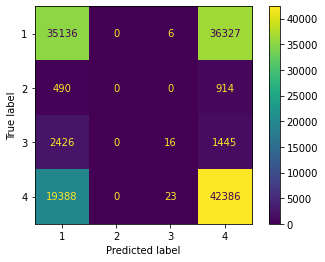

In [37]:
plot_confusion_matrix(dt, X_test, y_test)

In [38]:
bayes = CategoricalNB()
ohe = OneHotEncoder()
logreg = LinearSVC()
rf = RandomForestClassifier()
ovr = OneVsRestClassifier(logreg)

In [39]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171507 entries, 0 to 171506
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   CRASH_RECORD_ID     171507 non-null  object  
 1   TRAFFIC_DEVICE      171507 non-null  int64   
 2   BAD_WEATHER         171507 non-null  int64   
 3   BAD_VISIBILITY      171507 non-null  int64   
 4   BAD_TRAFFIC         171507 non-null  int64   
 5   BAD_ROAD_CONDITION  171507 non-null  int64   
 6   DEFECT_ROAD         171507 non-null  int64   
 7   Target1             171507 non-null  int64   
 8   NUM_PASSENGERS      171507 non-null  int64   
 9   VEHICLE_DEFECT      171507 non-null  int64   
 10  CRASH_DATE          171507 non-null  object  
 11  AGE                 171507 non-null  float64 
 12  DRIVER_ACTION       171507 non-null  object  
 13  DRIVER_VISION       171507 non-null  object  
 14  PHYSICAL_CONDITION  171507 non-null  object  
 15  AGE_RANGES       

In [40]:
ovr.fit(X_train, y_train)
dt.fit(X_train, y_train)
print('One vs Rest Score: {}'.format(ovr.score(X_train, y_train)))
print('Decision Tree Score: {}'.format(dt.score(X_train, y_train))) 

One vs Rest Score: 0.5599452451578292
Decision Tree Score: 0.5611216563099182


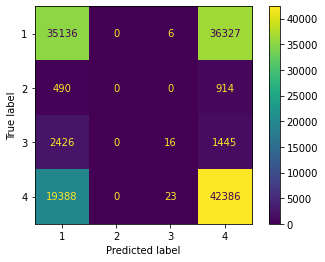

In [41]:
plot_confusion_matrix(dt, X_test, y_test);

In [42]:
# train_pred = ovr.predict(X_train)
# train_pred = label_binarize(train_pred, classes=len(main_df.Target1))
# y_test = label_binarize(y_test, classes=len(main_df.Target1))


In [43]:
# roc_auc_score(y_train, train_pred, multi_class='ovo', average='macro')

In [44]:
X2 = main_df.drop(['Target1', 'CRASH_RECORD_ID', 'CRASH_DATE', 'AGE'], axis=1)
y2 = main_df.Target1

X2 = ohe.fit_transform(X2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state = 1)


In [45]:
ovr.fit(X_train2, y_train2)
dt.fit(X_train2, y_train2)
print('One vs Rest Score: {}'.format(ovr.score(X_train2, y_train2)))
print('Decision Tree Score: {}'.format(dt.score(X_train2, y_train2))) 

One vs Rest Score: 0.7068024566586333
Decision Tree Score: 0.7217212158905387


# Piplines

In [87]:
pipeline_1 = Pipeline([('ss', StandardScaler()), 
                        ('RF', RandomForestClassifier(random_state = 1,  max_depth=100))])

In [88]:
grid = [{'RF__max_depth': [4, 5, 6], 
         'RF__min_samples_split': [0.1, 1.0, 10], 
         'RF__min_samples_leaf': [0.1, 0.5, 5]}]
GS = GridSearchCV(estimator=pipeline_1, 
                          param_grid=grid, 
                          scoring='precision', 
                          cv=5)

In [ ]:
#GS.fit()

In [ ]:
#GS.cv_results_

In [ ]:
#GS.best_estimator_.score()

In [ ]:
#GS.best_params_

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***